In [5]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt 
import re
# import matplotlib.patches as patches
from matplotlib.path import Path

In [6]:
directory = '../influx_random_sims_contInjection/N_realisation_1/'

with open(os.path.join(directory, 'collision_series.pkl'), 'rb') as f:
    collision_series = pickle.load(f) 

with open(os.path.join(directory, 'masters_slaves_series.pkl'), 'rb') as f:
    masters_slaves_series = pickle.load(f)


files = sorted([file for file in os.listdir(directory) if file.endswith('.npy')], key=lambda x: int(re.search(r'\d+', x).group()))

npy_file = files[0]

data = np.load(os.path.join(directory, files[0]))
data_1 = np.load(os.path.join(directory, files[1]))

load geometry data

In [7]:
path = '../velocity_results/alpha04_2D_geometry.npy'
geometry = np.load(path)
x_core, y_core, y_lower_core, x_ring, y_ring = geometry.T

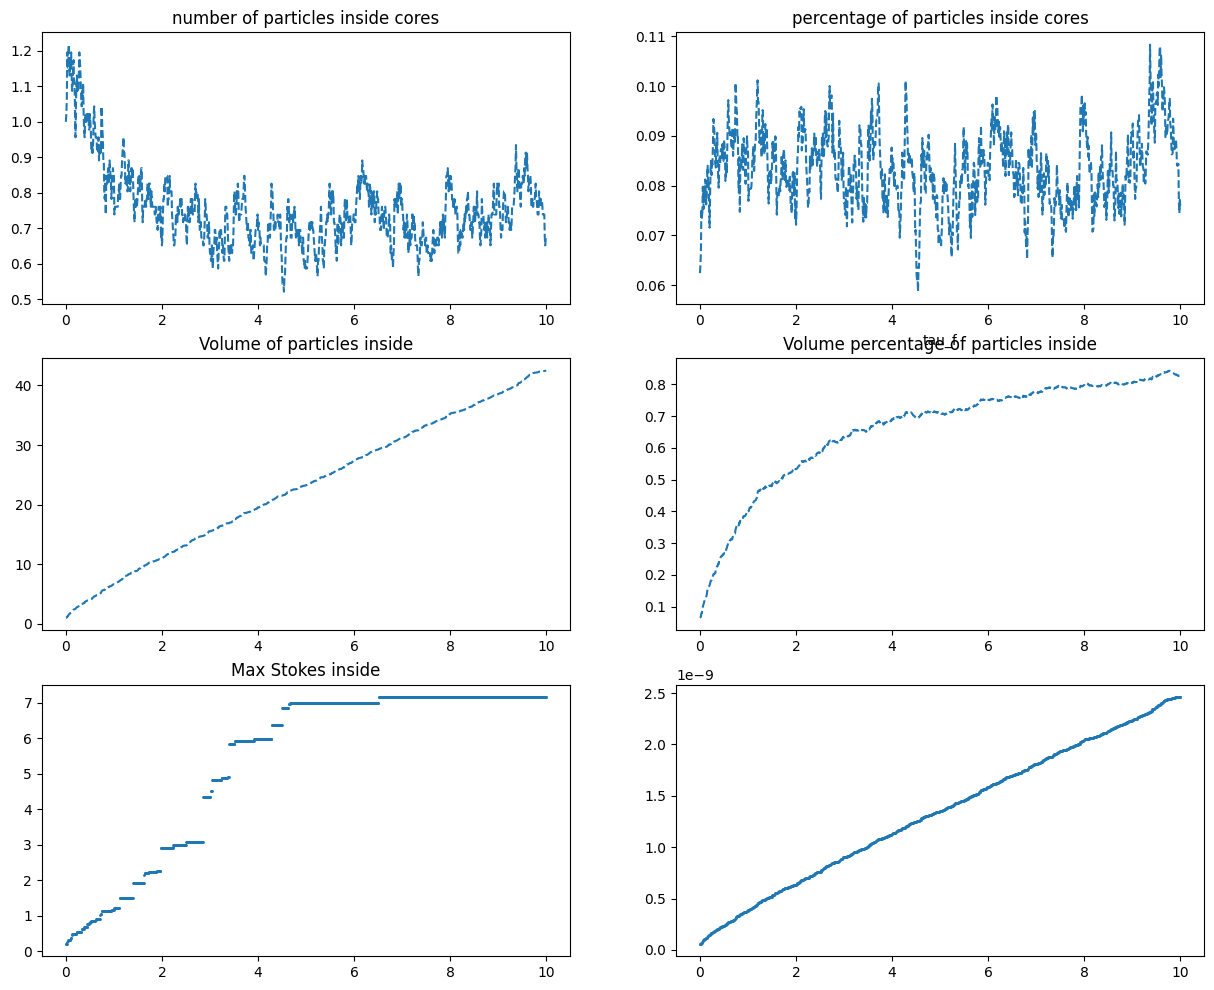

In [8]:
R0 = 1
dt = 0.01
K = 1e7

perc = []
numbers = []
volumes = []
volume_perc = []
max_st = []
vol_density = []
possible_st = []

for f, file in enumerate(files):
    data = np.load(os.path.join(directory, file))
    all_points = np.vstack([data[:, 1], data[:, 2]]).T

    upper_core = Path(np.vstack([x_core, y_core]).T).contains_points(all_points)
    upper_points = all_points[upper_core]
    lower_core = Path(np.vstack([x_core, y_lower_core]).T).contains_points(all_points)
    lower_points = all_points[lower_core]

    inside = np.vstack([upper_core, lower_core]).any(axis=0)
    inside_stokes = data[inside, -1]
    inside_volume = np.sum(inside_stokes ** 1.5)
    perc.append(np.sum(inside) / len(inside))
    numbers.append(np.sum(inside))
    volumes.append(inside_volume)
    volume_perc.append(inside_volume / np.sum(data[:, -1] ** 1.5))
    max_st.append(np.max(inside_stokes) if len(inside_stokes) > 0 else None)
    vol_density.append(np.sum((inside_stokes / K) ** 1.5) / (R0**3))

    # clear_output(wait=True)
    # ax.hist(inside_stokes, bins=10, alpha=0.5, label=f)
    # plt.scatter(data[:,1][inside], data[2][inside], 'o', markersize=1, label=f)

fig, ax = plt.subplots(3, 2, figsize=(15, 12))
ax[0,1].plot(np.arange(len(perc)) * dt, perc, '--', label='0', markersize=1)
ax[0,1].set_title('percentage of particles inside cores')
ax[0,1].set_xlabel('tau_f')
ax[0,0].plot(np.arange(len(numbers))* dt, numbers/numbers[0], '--', label='0',markersize=1)
ax[0,0].set_title('number of particles inside cores')
ax[1,0].plot(np.arange(len(volumes))* dt, volumes/volumes[0], '--', label='0', markersize=1)
ax[1,0].set_title('Volume of particles inside')
ax[1,1].plot(np.arange(len(volume_perc))* dt, volume_perc, '--', label='0',markersize=1)
ax[1,1].set_title('Volume percentage of particles inside')
ax[2,0].plot(np.arange(len(max_st))* dt, max_st, 'o', label='0', markersize=1)
ax[2,0].set_title('Max Stokes inside')
ax[2,1].plot(np.arange(len(vol_density))* dt, vol_density, 'o', label='0', markersize=1)

plt.show()